# Read dataset

In [67]:
import pandas as pd
import numpy as np

# read eval_images.csv
df_eval_image = pd.read_csv('./eval_images.csv')
df_eval_image.head()

,ImageID,ans,left_eye,mouth_left,mouth_right,nose,right_eye,xmax,xmin,ymax,ymin
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,0.0,[159.94765 245.79883],[202.66867 303.33243],[165.82513 341.00085],[238.29689 339.5652 ],[248.55081 246.74051],321.0,95.0,426.0,101.0
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,0.0,[153.5561 209.29773],[201.175 274.99194],[151.23026 304.05853],[238.04218 309.0641 ],[248.61557 213.56964],323.0,63.0,392.0,65.0
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,0.0,[178.43823 280.6245 ],[220.13889 367.3591 ],[173.10217 393.4497 ],[276.64868 406.48257],[287.9018 295.79413],381.0,96.0,500.0,117.0
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,0.0,[134.09756 191.11125],[180.49127 249.66585],[141.08005 302.4782 ],[219.44518 308.1704 ],[233.16576 194.82585],304.0,57.0,399.0,56.0
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,0.0,[154.71976 229.19803],[195.67284 278.36395],[163.45627 317.95676],[233.79602 314.96124],[234.59561 226.6688 ],301.0,91.0,400.0,96.0


In [68]:
# read train_images.csv
df_train = pd.read_csv('./train_images.csv')
df_train.head()

,age,gender,id,image_file_path,left_eye,mouth_left,mouth_right,nose,path,race,right_eye,xmax,xmin,ymax,ymin
0,45.0,female,000001,/content/input/data/train/images/000001_female...,[149.76358 233.61346],[175.8628 265.27472],[149.8467 291.00482],[202.71523 292.39996],000001_female_Asian_45,Asian,[208.6804 233.47809],264.0,96.0,357.0,131.0
1,45.0,female,000001,/content/input/data/train/images/000001_female...,[148.73956 220.77875],[176.10895 244.32928],[149.41522 278.4701 ],[198.27942 280.3857 ],000001_female_Asian_45,Asian,[210.67366 221.58511],266.0,90.0,350.0,128.0
2,45.0,female,000001,/content/input/data/train/images/000001_female...,[147.76086 236.44846],[173.53278 265.25555],[151.70306 300.86823],[198.6903 300.5398],000001_female_Asian_45,Asian,[209.57555 235.75964],264.0,89.0,358.0,132.0
3,45.0,female,000001,/content/input/data/train/images/000001_female...,[140.34598 200.53593],[163.3272 235.96234],[140.9581 266.59738],[183.01236 268.91037],000001_female_Asian_45,Asian,[196.4499 203.56407],249.0,85.0,326.0,112.0
4,45.0,female,000001,/content/input/data/train/images/000001_female...,[141.22539 205.0979 ],[155.66748 241.8305 ],[134.01855 274.95554],[178.16583 281.25577],000001_female_Asian_45,Asian,[198.46149 211.60718],256.0,87.0,337.0,108.0


# Find Default Cropped images

In [69]:
df_train_new = df_train.copy()

In [70]:
# coordination reference: https://stages.ai/competitions/74/discussion/talk/post/516

# if coordination of eval_images is xmin = 50, ymin = 100, xmax = 350, ymax = 400 replace coordinate with xmin = 80, ymin = 50, xmax = 80 + 220, ymax = 50 + 320
df_train_new[(df_train_new["xmin"]==50.0) & (df_train_new["ymin"]==100.0)]

,age,gender,id,image_file_path,left_eye,mouth_left,mouth_right,nose,path,race,right_eye,xmax,xmin,ymax,ymin


In [71]:
# replace the coordination value of df_train_new
df_train_new.loc[(df_train_new["xmin"]==50.0) & (df_train_new["ymin"]==100.0) & (df_train_new["xmax"]==350.0) & (df_train_new["ymax"]==400.0), "xmin"] = 80.0
df_train_new.loc[(df_train_new["xmin"]==80.0) & (df_train_new["ymin"]==100.0) & (df_train_new["xmax"]==350.0) & (df_train_new["ymax"]==400.0), "ymin"] = 50.0
df_train_new.loc[(df_train_new["xmin"]==80.0) & (df_train_new["ymin"]==50.0) & (df_train_new["xmax"]==350.0) & (df_train_new["ymax"]==400.0), "xmax"] = 80.0 + 220.0
df_train_new.loc[(df_train_new["xmin"]==80.0) & (df_train_new["ymin"]==50.0) & (df_train_new["xmax"]==300.0) & (df_train_new["ymax"]==400.0), "ymax"] = 50.0 + 320.0

In [72]:
df_train_new.loc[(df_train_new["xmin"]==80.0) & (df_train_new["ymin"]==50.0) & (df_train_new["xmax"]==300.0) & (df_train_new["ymax"]==370.0)]

,age,gender,id,image_file_path,left_eye,mouth_left,mouth_right,nose,path,race,right_eye,xmax,xmin,ymax,ymin
34,59.0,female,000006,/content/input/data/train/images/000006_female...,NaN,NaN,NaN,NaN,000006_female_Asian_59,Asian,NaN,300.0,80.0,370.0,50.0
118,54.0,female,000021,/content/input/data/train/images/000021_female...,NaN,NaN,NaN,NaN,000021_female_Asian_54,Asian,NaN,300.0,80.0,370.0,50.0
321,58.0,female,000070,/content/input/data/train/images/000070_female...,NaN,NaN,NaN,NaN,000070_female_Asian_58,Asian,NaN,300.0,80.0,370.0,50.0
455,56.0,female,000224,/content/input/data/train/images/000224_female...,NaN,NaN,NaN,NaN,000224_female_Asian_56,Asian,NaN,300.0,80.0,370.0,50.0
853,51.0,female,000304,/content/input/data/train/images/000304_female...,NaN,NaN,NaN,NaN,000304_female_Asian_51,Asian,NaN,300.0,80.0,370.0,50.0
902,57.0,female,000344,/content/input/data/train/images/000344_female...,NaN,NaN,NaN,NaN,000344_female_Asian_57,Asian,NaN,300.0,80.0,370.0,50.0
916,58.0,female,000356,/content/input/data/train/images/000356_female...,NaN,NaN,NaN,NaN,000356_female_Asian_58,Asian,NaN,300.0,80.0,370.0,50.0
923,55.0,female,000357,/content/input/data/train/images/000357_female...,NaN,NaN,NaN,NaN,000357_female_Asian_55,Asian,NaN,300.0,80.0,370.0,50.0
986,59.0,female,000514,/content/input/data/train/images/000514_female...,NaN,NaN,NaN,NaN,000514_female_Asian_59,Asian,NaN,300.0,80.0,370.0,50.0
1007,58.0,female,000517,/content/input/data/train/images/000517_female...,NaN,NaN,NaN,NaN,000517_female_Asian_58,Asian,NaN,300.0,80.0,370.0,50.0


In [64]:
df_train_new.to_csv('./train_images_new.csv', index=False)

# Find cropped too small dataset

In [8]:
# plot distribution of [xmax - xmin] and [ymax - ymin] for df_train_new
import matplotlib.pyplot as plt
x_range = df_train_new["xmax"] - df_train_new["xmin"]
y_range = df_train_new["ymax"] - df_train_new["ymin"]

(array([  2.,   6.,   0.,   1.,   1.,   4.,   0.,   3.,   3.,   7.,   4.,
          5.,   4.,   6.,   2.,   4.,   3.,   4.,   1.,  12.,  13.,  26.,
         41.,  67.,  81., 116., 191., 198., 265., 298., 353., 514., 404.,
        425., 472., 487., 684., 553., 602., 585., 631., 595., 843., 636.,
        647., 674., 714., 808., 621., 592., 550., 542., 664., 426., 391.,
        344., 348., 360., 229., 239., 200., 208., 170., 206., 136., 115.,
         88.,  93.,  95.,  50.,  45.,  35.,  27.,  25.,  22.,  10.,  12.,
         10.,  10.,   4.,   4.,   8.,   3.,   4.,   4.,   3.,   3.,   2.,
          0.,   1.,   0.,   0.,   0.,   1.,   2.,   0.,   1.,   0.,   0.,
          2.]),
 array([ 56.  ,  59.19,  62.38,  65.57,  68.76,  71.95,  75.14,  78.33,
         81.52,  84.71,  87.9 ,  91.09,  94.28,  97.47, 100.66, 103.85,
        107.04, 110.23, 113.42, 116.61, 119.8 , 122.99, 126.18, 129.37,
        132.56, 135.75, 138.94, 142.13, 145.32, 148.51, 151.7 , 154.89,
        158.08, 161.27, 164.46

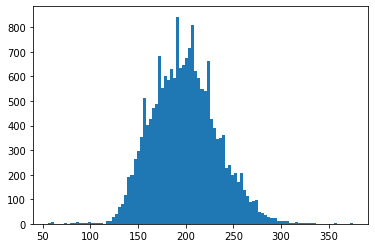

In [9]:
# plot distribution of x_range
plt.hist(x_range, bins=100)

In [77]:
# check distribution statistics of x_range
x_range.describe()

count    18900.000000
mean       198.895714
std         34.099106
min         56.000000
25%        175.000000
50%        198.000000
75%        221.000000
max        375.000000
dtype: float64

In [183]:
x_border = int(x_range.mean() - 1.96 * x_range.std()) + 1
x_border

133

(array([  4.,   4.,   1.,   0.,   3.,   3.,   4.,   5.,   9.,   4.,   3.,
          5.,   4.,   6.,   3.,   4.,   8.,   6.,   5.,  14.,  41.,  52.,
         64.,  92., 154., 248., 220., 275., 295., 322., 420., 425., 466.,
        453., 523., 548., 534., 747., 638., 648., 619., 661., 684., 680.,
        699., 659., 677., 683., 627., 551., 702., 473., 462., 387., 347.,
        346., 270., 261., 263., 236., 192., 175., 156., 134.,  99., 112.,
         82.,  68.,  63.,  36.,  43.,  33.,  36.,  24.,  12.,  24.,   7.,
         12.,   8.,   7.,   3.,   3.,   2.,   6.,   4.,   2.,   2.,   1.,
          2.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,
          1.]),
 array([ 81.  ,  85.08,  89.16,  93.24,  97.32, 101.4 , 105.48, 109.56,
        113.64, 117.72, 121.8 , 125.88, 129.96, 134.04, 138.12, 142.2 ,
        146.28, 150.36, 154.44, 158.52, 162.6 , 166.68, 170.76, 174.84,
        178.92, 183.  , 187.08, 191.16, 195.24, 199.32, 203.4 , 207.48,
        211.56, 215.64, 219.72

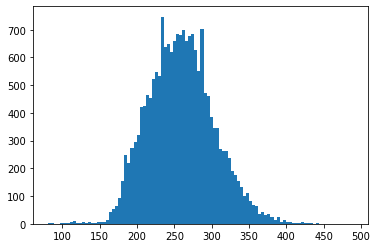

In [10]:
# plot distribution of y_range
plt.hist(y_range, bins=100)

In [35]:
y_range.describe()

count    18900.000000
mean       259.109365
std         44.194035
min         81.000000
25%        228.000000
50%        258.000000
75%        287.000000
max        489.000000
dtype: float64

In [184]:
# get - 2 sigma of y_range
y_border = int(y_range.mean() - 1.96 * y_range.std()) + 1
y_border

173

In [179]:
x_border, y_border

(137, 177)

In [185]:
print(x_border * y_border, 224 * 224)

23009 50176


In [186]:
# find rows that [xmax - xmin] < 100 or [ymax - ymin] < 100

# df_train_new[(df_train_new["xmax"] - df_train_new["xmin"] < 122) & (df_train_new["ymax"] - df_train_new["ymin"] < 150)]
images_too_small = df_train_new[(df_train_new["xmax"] - df_train_new["xmin"] < x_border) & (df_train_new["ymax"] - df_train_new["ymin"] < y_border)]
images_too_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 124 to 18776
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              170 non-null    float64
 1   gender           170 non-null    object 
 2   id               170 non-null    object 
 3   image_file_path  170 non-null    object 
 4   left_eye         170 non-null    object 
 5   mouth_left       170 non-null    object 
 6   mouth_right      170 non-null    object 
 7   nose             170 non-null    object 
 8   path             170 non-null    object 
 9   race             170 non-null    object 
 10  right_eye        170 non-null    object 
 11  xmax             170 non-null    float64
 12  xmin             170 non-null    float64
 13  ymax             170 non-null    float64
 14  ymin             170 non-null    float64
dtypes: float64(5), object(10)
memory usage: 21.2+ KB


In [201]:
# find images_too_small in df_train_new and set default value as xmin =80 , ymin = 50, xmax = 80 + 220, ymax = 50 + 320

df_train_too_small = df_train_new[(df_train_new["xmax"] - df_train_new["xmin"] < x_border) & (df_train_new["ymax"] - df_train_new["ymin"] < y_border)]
df_train_too_small["image_file_path"]

124      /content/input/data/train/images/000022_female...
1399     /content/input/data/train/images/000592_female...
1697     /content/input/data/train/images/000644_female...
3181     /content/input/data/train/images/001074_female...
3542     /content/input/data/train/images/001136_male_A...
                               ...                        
18070    /content/input/data/train/images/006621_male_A...
18177    /content/input/data/train/images/006648_female...
18194    /content/input/data/train/images/006652_male_A...
18774    /content/input/data/train/images/006928_male_A...
18776    /content/input/data/train/images/006928_male_A...
Name: image_file_path, Length: 170, dtype: object

In [202]:
# set xmin = 80, ymin = 50, xmax = 80 + 220, ymax = 50 + 320 for df_train_new that matches df_train_too_small
df_train_new.loc[df_train_new["image_file_path"].isin(df_train_too_small["image_file_path"]), "xmin"] = 80.0
df_train_new.loc[df_train_new["image_file_path"].isin(df_train_too_small["image_file_path"]), "ymin"] = 50.0
df_train_new.loc[df_train_new["image_file_path"].isin(df_train_too_small["image_file_path"]), "xmax"] = 80.0 + 220.0
df_train_new.loc[df_train_new["image_file_path"].isin(df_train_too_small["image_file_path"]), "ymax"] = 50.0 + 320.0

In [203]:
df_train_new.to_csv('./train_images.csv', index=False)

In [187]:
# move the images that [xmax - xmin] < 100 or [ymax - ymin] < 100 to a new folder
""" import shutil

for path in images_too_small["image_file_path"]:
  # replace /content/input/data/train/images with ./input/data/train/images
  image_file_path = path.replace('/content/input/data/train/images', './input/data/train/cropped_images')
  profile = image_file_path.split("/")[-2]
  image_name = image_file_path.split("/")[-1]

  new_image_name = profile + "_" + image_name
  # copy to new folder as new_image_name
  # shutil.copy(image_file_path, "./too_small_train")
  shutil.copy(image_file_path, os.path.join("./too_small_train",new_image_name))
 """

' import shutil\n\nfor path in images_too_small["image_file_path"]:\n  # replace /content/input/data/train/images with ./input/data/train/images\n  image_file_path = path.replace(\'/content/input/data/train/images\', \'./input/data/train/cropped_images\')\n  profile = image_file_path.split("/")[-2]\n  image_name = image_file_path.split("/")[-1]\n\n  new_image_name = profile + "_" + image_name\n  # copy to new folder as new_image_name\n  # shutil.copy(image_file_path, "./too_small_train")\n  shutil.copy(image_file_path, os.path.join("./too_small_train",new_image_name))\n '

In [205]:
x_border, y_border

(133, 173)

In [208]:
df_eval_image = pd.read_csv('./eval_images.csv')
df_eval_image.head()

,ImageID,ans,left_eye,mouth_left,mouth_right,nose,right_eye,xmax,xmin,ymax,ymin
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,0.0,[159.94765 245.79883],[202.66867 303.33243],[165.82513 341.00085],[238.29689 339.5652 ],[248.55081 246.74051],321.0,95.0,426.0,101.0
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,0.0,[153.5561 209.29773],[201.175 274.99194],[151.23026 304.05853],[238.04218 309.0641 ],[248.61557 213.56964],323.0,63.0,392.0,65.0
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,0.0,[178.43823 280.6245 ],[220.13889 367.3591 ],[173.10217 393.4497 ],[276.64868 406.48257],[287.9018 295.79413],381.0,96.0,500.0,117.0
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,0.0,[134.09756 191.11125],[180.49127 249.66585],[141.08005 302.4782 ],[219.44518 308.1704 ],[233.16576 194.82585],304.0,57.0,399.0,56.0
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,0.0,[154.71976 229.19803],[195.67284 278.36395],[163.45627 317.95676],[233.79602 314.96124],[234.59561 226.6688 ],301.0,91.0,400.0,96.0


In [209]:
df_eval_too_small = df_eval_image[(df_eval_image["xmax"] - df_eval_image["xmin"] < x_border) & (df_eval_image["ymax"] - df_eval_image["ymin"] < y_border)]
df_eval_too_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 86 to 12584
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ImageID      54 non-null     object 
 1   ans          54 non-null     float64
 2   left_eye     54 non-null     object 
 3   mouth_left   54 non-null     object 
 4   mouth_right  54 non-null     object 
 5   nose         54 non-null     object 
 6   right_eye    54 non-null     object 
 7   xmax         54 non-null     float64
 8   xmin         54 non-null     float64
 9   ymax         54 non-null     float64
 10  ymin         54 non-null     float64
dtypes: float64(5), object(6)
memory usage: 5.1+ KB


In [207]:
# set xmin = 80, ymin = 50, xmax = 80 + 220, ymax = 50 + 320 for df_eval_image that matches df_eval_too_small
df_eval_image.loc[df_eval_image["ImageID"].isin(df_eval_too_small["ImageID"]), "xmin"] = 80.0
df_eval_image.loc[df_eval_image["ImageID"].isin(df_eval_too_small["ImageID"]), "ymin"] = 50.0
df_eval_image.loc[df_eval_image["ImageID"].isin(df_eval_too_small["ImageID"]), "xmax"] = 80.0 + 220.0
df_eval_image.loc[df_eval_image["ImageID"].isin(df_eval_too_small["ImageID"]), "ymax"] = 50.0 + 320.0
df_eval_image.to_csv('./eval_images.csv', index=False)

In [191]:
# move the images that [xmax - xmin] < 100 or [ymax - ymin] < 100 to a new folder
import shutil

for path in eval_too_small["ImageID"]:
  # replace /content/input/data/train/images with ./input/data/train/images
  path = './input/data/eval/cropped_images/' + path
  image_name = path.split("/")[-1]
  print(image_name)
  # copy to new folder as new_image_name
  # shutil.copy(image_file_path, "./too_small_train")
  shutil.copy(path, os.path.join("./too_small_eval",image_name))


9b3973f7f97d86acf0ceec48052ae2348df79e4a.jpg
faf8f64456dc225292577404562ac5fffe87f421.jpg
5f0622a7630ce623ae21bbc6e8be59ea70d04ca4.jpg
2bfeed8934c4805f7ea437c11d38ba5bdaf7bbed.jpg
921bbd8433b5832a10e52a1156c9ec160e8bf340.jpg
c5527e7882a9c49b7d0e6e4f2ef8742f19c37bb2.jpg
82d7572d6e5e0f79cec897eea120fd4fee640733.jpg
1aabfc8be0c72a2c561cc21f8c805495230e1cb2.jpg
9ee8c1c35e866eab9a7c1aa080468e1e1db9a188.jpg
68bfb26a67996239f3b8b49801ea192522bdd02b.jpg
049dfcefa34d0292e4166607bb9a3d52f4e268db.jpg
22dee5ffbb9b2807f4bad8e2e1f08a1a45ed4564.jpg
1cd35f3c3e085f4147ce5f01aca3491243df1aab.jpg
238786b2117389087a05e8427350aa28ba1006e2.jpg
afa73b5d5c38ff2bdbcdfa0502de0ea04bd3ebfe.jpg
289eb11fe093f3f6ac82ba3b7e3896679dacda4b.jpg
6f08e1050ca6bdb28097ac5eb5efd75b091a3c9e.jpg
00f43ce34e86a53bb0864fc63cd8cd123c57bb9c.jpg
941f3e6d7c13df1056a198a205cd61936987fa0e.jpg
879abba662cb80bab8268083f6199695d7f324fb.jpg
80b5e65d8fcffa2e3a29595c35cb0f27aac06efc.jpg
55036065ad6590ba79cf4575fd64365c613dc6ea.jpg
eea208ffdb